In [6]:
import sys
sys.path.append("/Users/erikbohnsack/Code/MOT/conventional-MOT")
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge 
from matplotlib.collections import PatchCollection
import platform
import math

from data_utils import kitti_stuff
from pmbm.poisson import Poisson
import numpy as np
from utils.plot_stuff import plot_cov_ellipse

if platform.system() == 'Darwin':
    root = '/Users/erikbohnsack/data/'
else:
    root = '/home/mlt/data'

kitti = kitti_stuff.Kitti(ROOT=root, split='training')
sequence_idx = 0
kitti.lbls = kitti.load_labels(sequence_idx)

In [7]:
global_spawn_locations = []
for seq_id in range(21):
    lbls = kitti.load_labels(seq_id)
    seq_track_id = []
    seq_spawn_locations = []
    for frame_idx in range(len(lbls)):
        for item in lbls[frame_idx]:
            if item.track_id == -1:
                continue
            if item.track_id not in seq_track_id:
                seq_track_id.append(item.track_id)
                #if frame_idx:
                seq_spawn_locations.append(item.location)
    global_spawn_locations.extend(seq_spawn_locations)

In [8]:
r_one = [np.array([[3], [y], [0], [0]]) for y in range(5, 80, 5)]
r_two = [np.array([[8], [y], [0], [0]]) for y in range(5, 70, 5)]
r_three = [np.array([[13], [y], [0], [0]]) for y in range(25, 60, 5)]
l_one = [np.array([[-3], [y], [0], [0]]) for y in range(5, 85, 5)]
l_two = [np.array([[-8], [y], [0], [0]]) for y in range(5, 85, 5)]
l_three = [np.array([[-13], [y], [0], [0]]) for y in range(20, 80, 5)]
l_four = [np.array([[-18], [y], [0], [0]]) for y in range(25, 70, 5)]
l_five = [np.array([[-23], [y], [0], [0]]) for y in range(40, 70, 5)]

_left = [np.array([[-12], [12], [0], [0]]),
                   np.array([[-16], [20], [0], [0]]),
                   np.array([[-20], [28], [0], [0]]),
                   np.array([[-24], [36], [0], [0]])]

_right = [np.array([[12], [12], [0], [0]]),
                   np.array([[16], [20], [0], [0]]),
                   np.array([[20], [28], [0], [0]]),
                   np.array([[24], [36], [0], [0]])]


birth_state = r_one + r_two + r_three + l_one + l_two + _left + _right + l_three + l_four + l_five
birth_var = 1 * np.eye(4)
prune_threshold_poisson = 0.3
birth_weight_factor = 1
poisson_reduce_factor = 0.1
poisson_merge_threshold = 4
#poisson = Poisson(birth_state=birth_state,
 #                              birth_var=birth_var,
 #                              prune_threshold=prune_threshold_poisson,
 #                              birth_weight_factor=birth_weight_factor,
 #                              reduce_factor=poisson_reduce_factor,
 #                              merge_threshold=poisson_merge_threshold)
#poisson.give_birth()

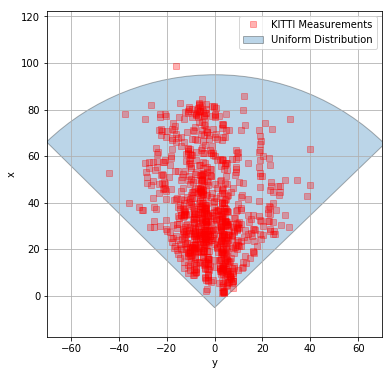

In [49]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

xlim = 70
ylim = 70

center = (0, -5)
r = 100
theta1 = 0.78 * 180 / math.pi
theta2 = 2.35 * 180 / math.pi
wedge = Wedge(center, r, theta1, theta2, width=None, label="Uniform Distribution", alpha=0.3, edgecolor='k')
wedge_patch = ax.add_patch(wedge)

for i, meas in enumerate(global_spawn_locations):
    if i == 0:
        meas = ax.plot(meas[0], meas[2], 'rs', label='KITTI Measurements', alpha=0.3)
    else:
        ax.plot(meas[0], meas[2], 'rs', alpha=0.3)





plt.autoscale(enable=False)
plt.xlim(-xlim, xlim)
plt.ylim(-0.25*ylim, 1.75*ylim)
plt.grid(True)
#plt.legend((wedge_patch, meas), ("Uniform", "KITTI")) 
plt.legend()
plt.ylabel("x")
plt.xlabel("y")

plt.show()
fig.savefig("uniform.png")